In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader,sampler,Dataset
import torchvision.datasets as dset
import torchvision.transforms as T
import timeit
from PIL import Image
import os
import numpy as np
import scipy.io
#plotting and visualization library
import matplotlib.pyplot as plt
#Display on the notebook
%matplotlib inline
plt.ion() #Turn interactive mode on.
import torch.nn.functional as F

In [ ]:
!mkdir lab7_data
!gdown -O lab7_data.zip "https://drive.google.com/u/0/uc?id=1axLDzmCP4XR8xChjuVpnNeeqZIYPAcs3"
!unzip lab7_data.zip -d lab7_data/

Downloading...
From: https://drive.google.com/u/0/uc?id=1axLDzmCP4XR8xChjuVpnNeeqZIYPAcs3
To: /content/lab7_data.zip
100% 41.6M/41.6M [00:00<00:00, 142MB/s]
Archive:  lab7_data.zip
   creating: lab7_data/event_avi/
   creating: lab7_data/event_avi/swipeUP/
  inflating: lab7_data/event_avi/swipeUP/swipeUP_person03_illum01_set10.avi  
  inflating: lab7_data/event_avi/swipeUP/swipeUP_person02_illum01_set02.avi  
  inflating: lab7_data/event_avi/swipeUP/swipeUP_person03_illum01_set04.avi  
  inflating: lab7_data/event_avi/swipeUP/swipeUP_person06_illum01_set07.avi  
  inflating: lab7_data/event_avi/swipeUP/swipeUP_person07_illum01_set01.avi  
  inflating: lab7_data/event_avi/swipeUP/swipeUP_person06_illum01_set06.avi  
  inflating: lab7_data/event_avi/swipeUP/swipeUP_person02_illum01_set03.avi  
  inflating: lab7_data/event_avi/swipeUP/swipeUP_person03_illum01_set05.avi  
  inflating: lab7_data/event_avi/swipeUP/swipeUP_person03_illum01_set07.avi  
  inflating: lab7_data/event_avi/swipeUP/

In [ ]:
import os

path2data = "./"
sub_folder = "lab7_data/event_avi"
sub_folder_jpg = "lab7_data_jpg"
path2aCatgs = os.path.join(path2data, sub_folder)

listOfCategories = os.listdir(path2aCatgs)
listOfCategories, len(listOfCategories)

(['swipeDown',
  'rotation_CW',
  'swipeV',
  'rotation_CCW',
  'Z',
  'right_swipe',
  'left_swipe',
  'swipeUP',
  'comeHere',
  'X'],
 10)

In [ ]:
for cat in listOfCategories:
    print("category:", cat)
    path2acat = os.path.join(path2aCatgs, cat)
    listOfSubs = os.listdir(path2acat)
    print("number of sub-folders:", len(listOfSubs))
    print("-"*50)

category: swipeDown
number of sub-folders: 120
--------------------------------------------------
category: rotation_CW
number of sub-folders: 120
--------------------------------------------------
category: swipeV
number of sub-folders: 121
--------------------------------------------------
category: rotation_CCW
number of sub-folders: 120
--------------------------------------------------
category: Z
number of sub-folders: 120
--------------------------------------------------
category: right_swipe
number of sub-folders: 120
--------------------------------------------------
category: left_swipe
number of sub-folders: 120
--------------------------------------------------
category: swipeUP
number of sub-folders: 120
--------------------------------------------------
category: comeHere
number of sub-folders: 121
--------------------------------------------------
category: X
number of sub-folders: 120
--------------------------------------------------


In [ ]:
import cv2
import numpy as np
def get_frames(filename, n_frames= 1):
    frames = []
    v_cap = cv2.VideoCapture(filename)
    v_len = int(v_cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_list= np.linspace(0, v_len-1, n_frames+1, dtype=np.int16)

    for fn in range(v_len):
        success, frame = v_cap.read()
        if success is False:
            continue
        if (fn in frame_list):
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(frame)
    v_cap.release()
    return frames, v_len

def store_frames(frames, path2store):
    for ii, frame in enumerate(frames):
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        path2img = os.path.join(path2store, "frame"+str(ii)+".jpg")
        cv2.imwrite(path2img, frame)

In [ ]:
!rm -rf lab7_data_jpg

In [ ]:
extension = ".avi"
n_frames = 16
for root, dirs, files in os.walk(path2aCatgs, topdown=False):
    for name in files:
        if extension not in name:
            continue
        path2vid = os.path.join(root, name)
        frames, vlen = get_frames(path2vid, n_frames= n_frames)
        path2store = path2vid.replace(sub_folder, sub_folder_jpg)
        path2store = path2store.replace(extension, "")
        print(path2store)
        os.makedirs(path2store, exist_ok= True)
        store_frames(frames, path2store)
    print("-"*50)

./lab7_data_jpg/swipeDown/swipeDown_person10_illum01_set07
./lab7_data_jpg/swipeDown/swipeDown_person09_illum01_set10
./lab7_data_jpg/swipeDown/swipeDown_person09_illum01_set03
./lab7_data_jpg/swipeDown/swipeDown_person11_illum01_set05
./lab7_data_jpg/swipeDown/swipeDown_person06_illum01_set09
./lab7_data_jpg/swipeDown/swipeDown_person12_illum01_set07
./lab7_data_jpg/swipeDown/swipeDown_person10_illum01_set02
./lab7_data_jpg/swipeDown/swipeDown_person03_illum01_set04
./lab7_data_jpg/swipeDown/swipeDown_person09_illum01_set06
./lab7_data_jpg/swipeDown/swipeDown_person07_illum01_set03
./lab7_data_jpg/swipeDown/swipeDown_person12_illum01_set10
./lab7_data_jpg/swipeDown/swipeDown_person04_illum01_set06
./lab7_data_jpg/swipeDown/swipeDown_person02_illum01_set01
./lab7_data_jpg/swipeDown/swipeDown_person02_illum01_set05
./lab7_data_jpg/swipeDown/swipeDown_person08_illum01_set06
./lab7_data_jpg/swipeDown/swipeDown_person01_illum01_set09
./lab7_data_jpg/swipeDown/swipeDown_person02_illum01_set

In [ ]:
from torchvision.transforms.functional import to_pil_image

In [ ]:
def get_vids(path2ajpgs):
    listOfCats = os.listdir(path2ajpgs)
    ids = []
    labels = []
    for catg in listOfCats:
        path2catg = os.path.join(path2ajpgs, catg)
        listOfSubCats = os.listdir(path2catg)
        path2subCats= [os.path.join(path2catg,los) for los in listOfSubCats]
        ids.extend(path2subCats)
        labels.extend([catg]*len(listOfSubCats))
    return ids, labels, listOfCats

In [ ]:
path2ajpgs= "lab7_data_jpg/"
all_vids, all_labels, catgs = get_vids(path2ajpgs)
len(all_vids), len(all_labels), len(catgs)

(1200, 1200, 10)

In [ ]:
all_vids[:1], all_labels[:3], catgs[:10]

(['lab7_data_jpg/swipeDown/swipeDown_person06_illum01_set01'],
 ['swipeDown', 'swipeDown', 'swipeDown'],
 ['swipeDown',
  'rotation_CW',
  'swipeV',
  'rotation_CCW',
  'Z',
  'right_swipe',
  'left_swipe',
  'swipeUP',
  'comeHere',
  'X'])

In [ ]:
labels_dict = {}
ind = 0
for uc in catgs:
    labels_dict[uc] = ind
    ind+=1
labels_dict

{'swipeDown': 0,
 'rotation_CW': 1,
 'swipeV': 2,
 'rotation_CCW': 3,
 'Z': 4,
 'right_swipe': 5,
 'left_swipe': 6,
 'swipeUP': 7,
 'comeHere': 8,
 'X': 9}

In [ ]:
num_classes =10
unique_ids = [id_ for id_, label in zip(all_vids,all_labels) if labels_dict[label]<num_classes]
unique_labels = [label for id_, label in zip(all_vids,all_labels) if labels_dict[label]<num_classes]
len(unique_ids),len(unique_labels)

(1200, 1200)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=2, test_size=0.1, random_state=0)
train_indx, test_indx = next(sss.split(unique_ids, unique_labels))

train_ids = [unique_ids[ind] for ind in train_indx]
train_labels = [unique_labels[ind] for ind in train_indx]
print(len(train_ids), len(train_labels))

test_ids = [unique_ids[ind] for ind in test_indx]
test_labels = [unique_labels[ind] for ind in test_indx]
print(len(test_ids), len(test_labels))

1080 1080
120 120


In [ ]:
train_ids[:10], train_labels[:10]

(['lab7_data_jpg/comeHere/comeHere_person07_illum01_set03',
  'lab7_data_jpg/rotation_CCW/rotation_CCW_person08_illum01_set07',
  'lab7_data_jpg/comeHere/comeHere_person11_illum01_set03',
  'lab7_data_jpg/comeHere/comeHere_person11_illum01_set10',
  'lab7_data_jpg/left_swipe/left_swipe_person04_illum01_set06',
  'lab7_data_jpg/swipeDown/swipeDown_person12_illum01_set04',
  'lab7_data_jpg/rotation_CCW/rotation_CCW_person06_illum01_set06',
  'lab7_data_jpg/rotation_CW/rotation_CW_person08_illum01_set05',
  'lab7_data_jpg/rotation_CW/rotation_CW_person12_illum01_set02',
  'lab7_data_jpg/Z/Z_person03_illum01_set02'],
 ['comeHere',
  'rotation_CCW',
  'comeHere',
  'comeHere',
  'left_swipe',
  'swipeDown',
  'rotation_CCW',
  'rotation_CW',
  'rotation_CW',
  'Z'])

In [ ]:
test_ids[:10], test_labels[:10]

(['lab7_data_jpg/right_swipe/right_swipe_person04_illum01_set10',
  'lab7_data_jpg/left_swipe/left_swipe_person07_illum01_set05',
  'lab7_data_jpg/swipeV/swipeV_person04_illum01_set08',
  'lab7_data_jpg/rotation_CW/rotation_CW_person08_illum01_set07',
  'lab7_data_jpg/rotation_CW/rotation_CW_person09_illum01_set02',
  'lab7_data_jpg/rotation_CCW/rotation_CCW_person09_illum01_set04',
  'lab7_data_jpg/left_swipe/left_swipe_person02_illum01_set05',
  'lab7_data_jpg/rotation_CCW/rotation_CCW_person07_illum01_set06',
  'lab7_data_jpg/Z/Z_person09_illum01_set01',
  'lab7_data_jpg/left_swipe/left_swipe_person11_illum01_set09'],
 ['right_swipe',
  'left_swipe',
  'swipeV',
  'rotation_CW',
  'rotation_CW',
  'rotation_CCW',
  'left_swipe',
  'rotation_CCW',
  'Z',
  'left_swipe'])

In [ ]:
from torch.utils.data import Dataset, DataLoader, Subset
import glob
from PIL import Image
import random

class VideoDataset(Dataset):
    def __init__(self, ids, labels, transform):
        self.transform = transform
        self.ids = ids
        self.labels = labels
    def __len__(self):
        return len(self.ids)
    def __getitem__(self, idx):
        path2imgs=glob.glob(self.ids[idx]+"/*.jpg")
        path2imgs = path2imgs[:timesteps]
        label = labels_dict[self.labels[idx]]
        frames = []
        for p2i in path2imgs:
            frame = Image.open(p2i)
            frames.append(frame)


        frames_tr = []
        for frame in frames:
            frame = self.transform(frame)
            frames_tr.append(frame)
        if len(frames_tr)>0:
            frames_tr = torch.stack(frames_tr)
        return frames_tr, label

In [ ]:
import torchvision.transforms as transforms
h, w = 128, 128
mean = [0.5, 0.5, 0.5]
std = [0.5, 0.5, 0.5]
train_transformer = transforms.Compose([
            transforms.Resize((h,w)),
            transforms.ToTensor(),
            transforms.Normalize(mean, std),
            ])

In [ ]:
timesteps = n_frames
train_ds = VideoDataset(ids= train_ids, labels= train_labels, transform= train_transformer)
print(len(train_ds))

1080


In [ ]:
imgs, label = train_ds[0]
imgs.shape, label, torch.min(imgs), torch.max(imgs)

(torch.Size([16, 3, 128, 128]), 8, tensor(-1.), tensor(1.))

In [ ]:
def denormalize(x_, mean, std):
    x = x_.clone()
    for i in range(3):
        x[i] = x[i]*std[i]+mean[i]
    x = to_pil_image(x)
    return x

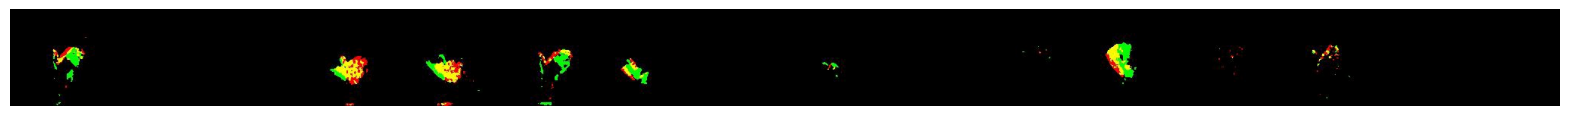

In [ ]:
plt.figure(figsize=(20,20))
plt.subplots_adjust(wspace=0, hspace=0)
for ii,img in enumerate(imgs):
    plt.subplot(1,16,ii+1)
    plt.imshow(denormalize(img, mean, std))
    plt.axis("off")

**Sample Event Clips**

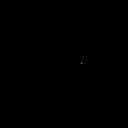


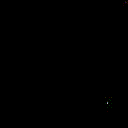

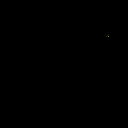

In [ ]:
test_transformer = transforms.Compose([
            transforms.Resize((h,w)),
            transforms.ToTensor(),
            transforms.Normalize(mean, std),
            ])
test_ds = VideoDataset(ids= test_ids, labels= test_labels, transform= test_transformer)
print(len(test_ds))

120


In [ ]:
imgs, label = test_ds[5]
imgs.shape, label, torch.min(imgs), torch.max(imgs)

(torch.Size([16, 3, 128, 128]), 3, tensor(-1.), tensor(1.))

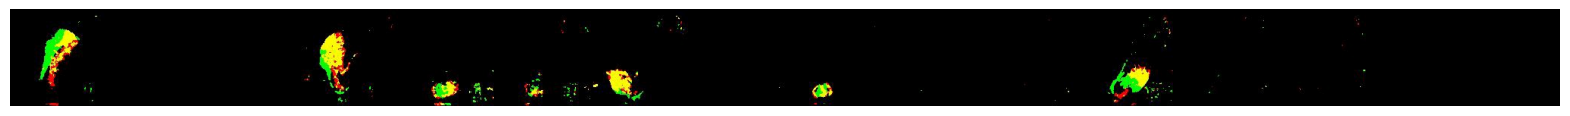

In [ ]:
plt.figure(figsize=(20,20))
plt.subplots_adjust(wspace=0, hspace=0)
for ii,img in enumerate(imgs):
    plt.subplot(1,16,ii+1)
    plt.imshow(denormalize(img, mean, std))
    plt.axis("off")

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
clip_dataloader_train = DataLoader(train_ds, batch_size=16,
                        shuffle=True, num_workers=4)
clip_dataloader_test = DataLoader(test_ds, batch_size=16,
                        shuffle=False, num_workers=4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
class Net3D(nn.Module):

    #define the learnable paramters by calling the respective modules (nn.Conv2d, nn.MaxPool2d etc.)
    def __init__(self):
        super(Net3D, self).__init__()

        #calling conv3d module for convolution
        self.conv1 = nn.Conv3d(in_channels = n_frames, out_channels = 50, kernel_size = 2, stride = 1)

        #calling MaxPool3d module for max pooling with downsampling of 2
        self.pool1 = nn.MaxPool3d(kernel_size=(1, 2, 2), stride=2)

        self.conv2 =  nn.Conv3d(in_channels = 50, out_channels = 100, kernel_size = (1, 3, 3), stride = 1)

        self.pool2 = nn.MaxPool3d(kernel_size=(1, 3, 3), stride=2)



        #fully connected layer
        self.fc1 = nn.Linear(100*30*30, 512)
        self.fc2 = nn.Linear(512,32)
        self.fc3 = nn.Linear(32,10)


    #defining the structure of the network
    def forward(self, x):
        #Applying relu activation after each conv layer
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        # print(x.shape)

        #reshaping to 1d for giving input to fully connected units
        x = x.view(-1, 100*30*30)

        x = self.fc1(F.relu(x))
        x = self.fc2(F.relu(x))
        x = self.fc3(x)
        return x

fixed_model_3d = Net3D().cuda()

#Printing the network architecture
print(fixed_model_3d)


Net3D(
  (conv1): Conv3d(16, 50, kernel_size=(2, 2, 2), stride=(1, 1, 1))
  (pool1): MaxPool3d(kernel_size=(1, 2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv3d(50, 100, kernel_size=(1, 3, 3), stride=(1, 1, 1))
  (pool2): MaxPool3d(kernel_size=(1, 3, 3), stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=90000, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)


In [ ]:
fixed_model_3d(torch.zeros(2,n_frames,3,128,128).cuda()).shape

torch.Size([2, 10])

In [ ]:
fixed_model_3d = Net3D().cuda()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(fixed_model_3d.parameters(), lr=1e-3)


In [ ]:
def train_3d(model, loss_fn, optimizer,dataloader,num_epochs = 1):
    for epoch in range(num_epochs):
        with torch.no_grad():
            check_accuracy_3d(model, clip_dataloader_test, True)
        print('Starting epoch %d / %d' % (epoch + 1, num_epochs))

        model.train()


        for t, sample in enumerate(dataloader):
            x_var = sample[0].cuda()#['clip']#.cuda()
            y_var = sample[1].long().cuda()#['Label'].long()#.cuda()

            scores = model(x_var)

            loss = loss_fn(scores, y_var)
            if (t + 1) % print_every == 0:
                print('t = %d, loss = %.4f' % (t + 1, loss.data.item()))

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()


def check_accuracy_3d(model, loader, test=False):
    num_correct = 0
    num_samples = 0
    model.eval() # Put the model in test mode (the opposite of model.train(), essentially)
    for t, sample in enumerate(loader):
        x_var = sample[0].cuda()#['clip']#.cuda()
        y_var = sample[1]#['Label']
        y_var=y_var.cpu()
        scores = model(x_var)
        _, preds = scores.data.cpu().max(1)

        num_correct += (preds.numpy() == y_var.numpy()).sum()
        num_samples += preds.size(0)
    acc = float(num_correct) / num_samples
    if(test):
      print('Test Accuracy %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))
    else:
      print('Train Accuracy %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))

# Exercise
- Train a model on this data and evaluate it
- Use a RNN/LSTM based network to train on the same dataset and evaluate it.
- Change the frames to 1 channel by averaging, repeat to achieve 3 channels and check the accuracy of both the models. [Similar to training on grayscale images]

## Training and Evaluating on Net3D

In [ ]:
print_every=20
fixed_model_3d.train()
train_3d(fixed_model_3d, loss_fn, optimizer,clip_dataloader_train, num_epochs=5)
fixed_model_3d.eval()
with torch.no_grad():

    check_accuracy_3d(fixed_model_3d, clip_dataloader_train)
    check_accuracy_3d(fixed_model_3d, clip_dataloader_test, True)

Test Accuracy 12 / 120 correct (10.00)
Starting epoch 1 / 5
t = 20, loss = 2.2813
t = 40, loss = 2.0669
t = 60, loss = 1.7131
Test Accuracy 33 / 120 correct (27.50)
Starting epoch 2 / 5
t = 20, loss = 1.4993
t = 40, loss = 1.8396
t = 60, loss = 0.6066
Test Accuracy 90 / 120 correct (75.00)
Starting epoch 3 / 5
t = 20, loss = 0.6730
t = 40, loss = 0.3302
t = 60, loss = 0.3231
Test Accuracy 90 / 120 correct (75.00)
Starting epoch 4 / 5
t = 20, loss = 0.3297
t = 40, loss = 0.1955
t = 60, loss = 0.4374
Test Accuracy 101 / 120 correct (84.17)
Starting epoch 5 / 5
t = 20, loss = 0.2960
t = 40, loss = 0.0710
t = 60, loss = 0.1242
Train Accuracy 1069 / 1080 correct (98.98)
Test Accuracy 106 / 120 correct (88.33)


## Training and Evaluating on RNN

In [ ]:
class Rnn3D(nn.Module):

    #define the learnable paramters by calling the respective modules (nn.Conv2d, nn.MaxPool2d etc.)
    def __init__(self):
        super(Rnn3D, self).__init__()

        #calling conv3d module for convolution
        conv1 = nn.Conv3d(in_channels = n_frames, out_channels = 50, kernel_size = 2, stride = 1)

        #calling MaxPool3d module for max pooling with downsampling of 2
        pool1 = nn.MaxPool3d(kernel_size=(1, 2, 2), stride=2)

        conv2 =  nn.Conv3d(in_channels = 50, out_channels = 100, kernel_size = (1, 3, 3), stride = 1)

        pool2 = nn.MaxPool3d(kernel_size=(1, 3, 3), stride=2)

        self.feat_extractor=nn.Sequential(conv1,nn.ReLU(),pool1,conv2,nn.ReLU(),pool2)

        self.rnn = nn.LSTM(input_size=5625, hidden_size=128, num_layers=1,batch_first=True)
        self.fc1 = nn.Linear(128, 10)



    def forward(self, x):

        b_z, ts, c, h, w = x.shape

        y = self.feat_extractor(x)

        # reinstating the batchsize and frames
        y = y.view(b_z,ts,-1)
        #output has a size of 8x16x128 - basically we have the output for each frame of each clip.
        outp, (hn, cn) = self.rnn(y)
        # We only need the RNN/LSTM output of the last frame since it incorporates all the frame knowledge
        out = self.fc1(outp[:,-1,:])
        return out



model_rnn = Rnn3D().cuda()

#Printing the network architecture
print(model_rnn)


Rnn3D(
  (feat_extractor): Sequential(
    (0): Conv3d(16, 50, kernel_size=(2, 2, 2), stride=(1, 1, 1))
    (1): ReLU()
    (2): MaxPool3d(kernel_size=(1, 2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv3d(50, 100, kernel_size=(1, 3, 3), stride=(1, 1, 1))
    (4): ReLU()
    (5): MaxPool3d(kernel_size=(1, 3, 3), stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (rnn): LSTM(5625, 128, batch_first=True)
  (fc1): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(model_rnn.parameters(), lr=1e-4)

In [ ]:
model_rnn.train()
print_every = 20
train_3d(model_rnn, loss_fn, optimizer,clip_dataloader_train, num_epochs=10)
model_rnn.eval()
check_accuracy_3d(model_rnn, clip_dataloader_train)
check_accuracy_3d(model_rnn, clip_dataloader_test)

Test Accuracy 11 / 120 correct (9.17)
Starting epoch 1 / 10
t = 20, loss = 2.3160
t = 40, loss = 2.1014
t = 60, loss = 1.7663
Test Accuracy 66 / 120 correct (55.00)
Starting epoch 2 / 10
t = 20, loss = 1.3817
t = 40, loss = 1.2704
t = 60, loss = 0.8332
Test Accuracy 91 / 120 correct (75.83)
Starting epoch 3 / 10
t = 20, loss = 0.7191
t = 40, loss = 0.7490
t = 60, loss = 0.9973
Test Accuracy 93 / 120 correct (77.50)
Starting epoch 4 / 10
t = 20, loss = 0.5463
t = 40, loss = 0.6049
t = 60, loss = 0.3889
Test Accuracy 94 / 120 correct (78.33)
Starting epoch 5 / 10
t = 20, loss = 0.3916
t = 40, loss = 0.4997
t = 60, loss = 0.3532
Test Accuracy 97 / 120 correct (80.83)
Starting epoch 6 / 10
t = 20, loss = 0.4107
t = 40, loss = 0.2146
t = 60, loss = 0.4244
Test Accuracy 100 / 120 correct (83.33)
Starting epoch 7 / 10
t = 20, loss = 0.2620
t = 40, loss = 0.2980
t = 60, loss = 0.2198
Test Accuracy 97 / 120 correct (80.83)
Starting epoch 8 / 10
t = 20, loss = 0.3648
t = 40, loss = 0.2239
t = 60

##  Changing the frames to 1 channel by averaging

In [ ]:
len(train_ds)

1080

In [ ]:
class VideoDataset_avg(Dataset):
    def __init__(self, ids, labels, transform):
        self.transform = transform
        self.ids = ids
        self.labels = labels
    def __len__(self):
        return len(self.ids)
    def __getitem__(self, idx):
        path2imgs=glob.glob(self.ids[idx]+"/*.jpg")
        path2imgs = path2imgs[:timesteps]
        label = labels_dict[self.labels[idx]]
        frames = []
        for p2i in path2imgs:
            frame = Image.open(p2i)
            frames.append(frame)


        frames_tr = []
        for frame in frames:
            frame = self.transform(frame)
            frames_tr.append(frame)



        if len(frames_tr)>0:
            mat=np.zeros((128, 128))
            for i in range(0,16):
              for j in frames_tr[i]:
                mat1=j[0]
                mat2=j[1]
                mat3=j[2]

                for x in range(0,128):
                  mat[x]=(mat1[x]+ mat2[x]+mat3[x])/3

                if(torch.is_tensor(mat)==False):
                  mat=torch.from_numpy(mat)
                frames_tr[i][0]=mat
                frames_tr[i][1]=mat
                frames_tr[i][2]=mat

            frames_tr = torch.stack(frames_tr)
        return frames_tr, label

In [ ]:
train_ds_avg = VideoDataset_avg(ids= train_ids, labels= train_labels, transform= train_transformer)
print(len(train_ds_avg))

1080


In [ ]:
imgs, label = train_ds_avg[5]
imgs.shape, label, torch.min(imgs), torch.max(imgs)

(torch.Size([16, 3, 128, 128]), 0, tensor(-1.), tensor(-1.))

In [ ]:
test_ds_avg = VideoDataset_avg(ids= test_ids, labels= test_labels, transform= test_transformer)
print(len(test_ds_avg))

120


In [ ]:
clip_dataloader_train_avg = DataLoader(train_ds_avg, batch_size=16,
                        shuffle=True, num_workers=4)
clip_dataloader_test_avg = DataLoader(test_ds_avg, batch_size=16,
                        shuffle=False, num_workers=4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
check_accuracy_3d(fixed_model_3d, clip_dataloader_test)

Train Accuracy 106 / 120 correct (88.33)


In [ ]:
check_accuracy_3d(model_rnn, clip_dataloader_test)

Train Accuracy 97 / 120 correct (80.83)
